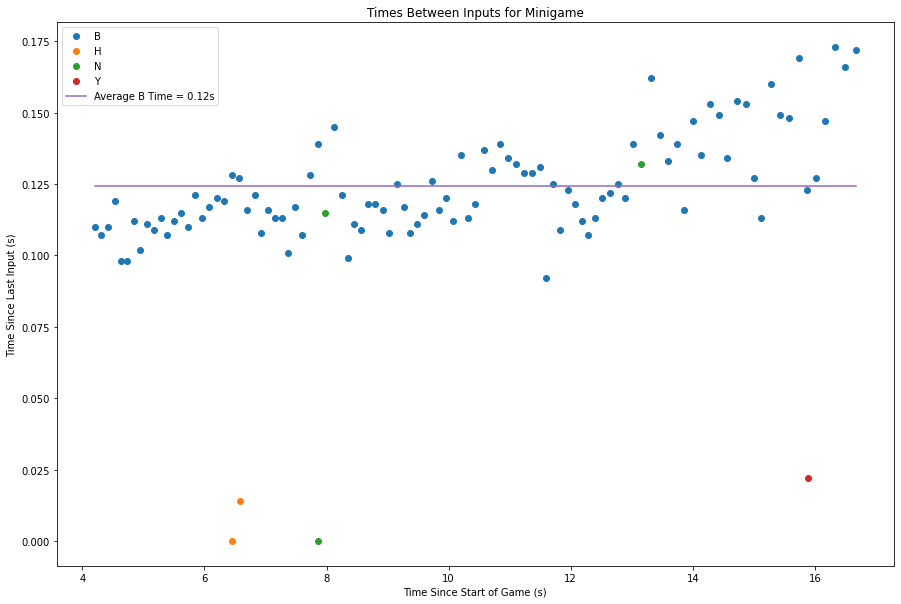

In [90]:
import json
import matplotlib.pyplot as plt

def delta_times_fn(times):
    result = []
    for i in range(len(times)-1):
        result.append((times[i+1] - times[i]))
    return result

# Load data from file
with open('./data.json') as f:
    data = json.load(f)
    
input_data = data.get('Events')

# Organize data
times = []
for i in input_data:
    if i.get('Value'):
        key = i.get('Key')
        time = float(i.get('TimeStamp'))
        times.append((key, time))
            
delta_times = delta_times_fn([j for (i,j) in times])
times = [(times[i+1][0], times[i+1][1], delta_times[i]) for i in range(len(delta_times)) ]
        
down_times_dict = {}
for (key, time, d_time) in times:
    if key not in down_times_dict:
        down_times_dict[key] = [(time, d_time)]
    else:
        down_times_dict[key].append((time, d_time))
        
# Create figure
_, fig = plt.subplots(figsize=(15, 10))

# Plot data
for key in down_times_dict.keys():
    ts = [t for (t, dt) in down_times_dict[key]]
    dts = [dt for (t, dt) in down_times_dict[key]]
    fig.plot(ts, dts, 'o', label=key)

# Average time
avg = 0
for i in down_times_dict['B']:
    avg += i[1]
avg /= len(down_times_dict['B'])

xs = [j for (i,j,k) in times]
ys = [avg for (i,j,k) in times]
fig.plot(xs, ys, '-',label='Average B Time = %.2fs' % avg)

# Misc. Figure Setup
fig.set_title('Times Between Inputs for Minigame')
fig.set_xlabel('Time Since Start of Game (s)')
fig.set_ylabel('Time Since Last Input (s)')
fig.legend()
